downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg


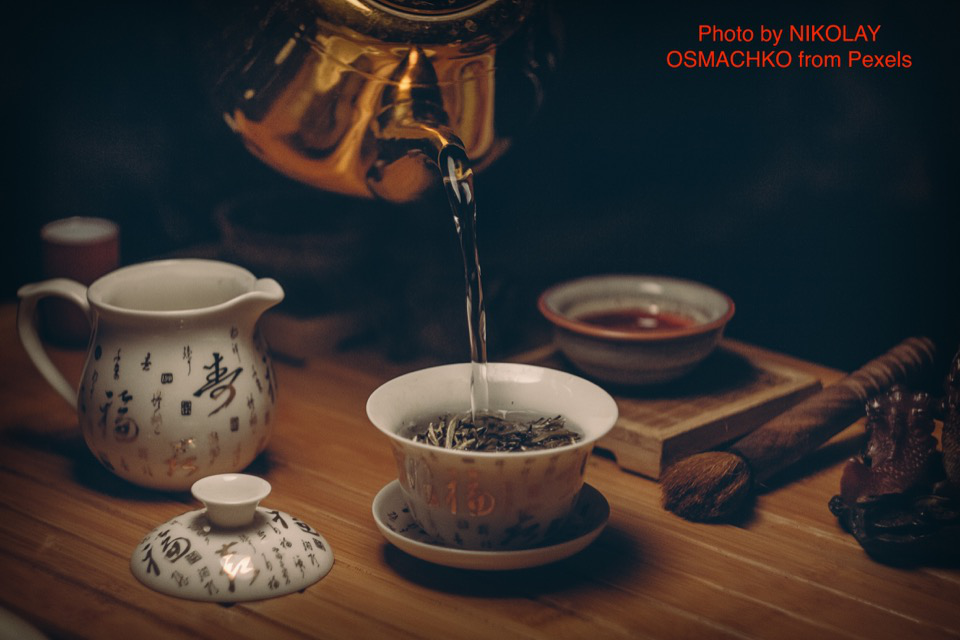

In [69]:
import cv2
import numpy as np
from math import *
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg"
imgc = url_to_image(url2)
cv2_imshow(imgc)

# Find ellipse by 6+ points

In [0]:
def draw_ellipse(img, points): 
  m = np.zeros((len(points), 6))

  for k in range(0, len(points)):
    m[k][0] = points[k][0]**2
    m[k][1] = 2*points[k][0]*points[k][1]
    m[k][2] = points[k][1]**2
    m[k][3] = 2*points[k][0]
    m[k][4] = 2*points[k][1]
    m[k][5] = 1
  
  mu, ms, mv = np.linalg.svd(m)
  R = mv[-1, :]
  R /= R[0] 

  E = np.array(
        [[R[0], R[1], R[3]],
         [R[1], R[2], R[4]],
         [R[3], R[4], R[5]]], np.double)

  if E[0, 0]*E[1, 1] <= E[0, 1]*E[1, 0]:
    print("Not Ellipse!")

  u, s, v = np.linalg.svd(E)
  u2 = np.matmul(u, np.diag(np.sqrt(s)))
  H = np.linalg.inv(u2.T)

  for alpha in range(0, 360):
    a1 = np.matmul(H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]])
    a1 = a1/a1[2]
    a2 = np.matmul(H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]])
    a2 = a2/a2[2]
    cv2.line(img, (a1[0], a1[1]), (a2[0], a2[1]), (0, 0, 255), 1)

  for k in range(0, len(points)):
    cv2.circle(img, (int(points[k][0]), int(points[k][1])), 3, (0, 255, 0))

  cv2_imshow(img)

### 6 points

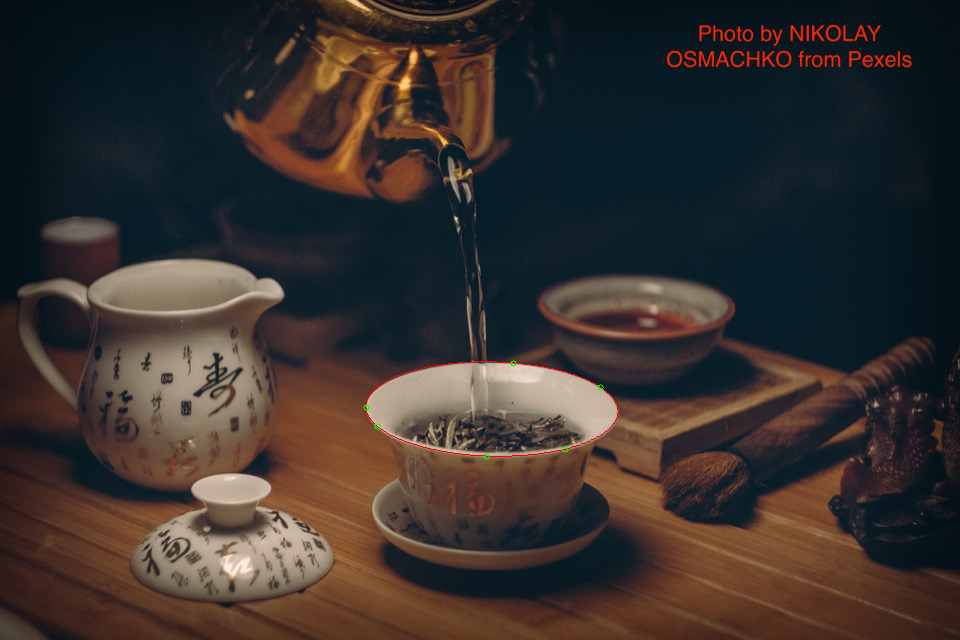

In [71]:
img = imgc.copy()
points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [600, 387] ], np.double)

draw_ellipse(img, points)

### 8 points (not ellispe)

Not Ellipse!


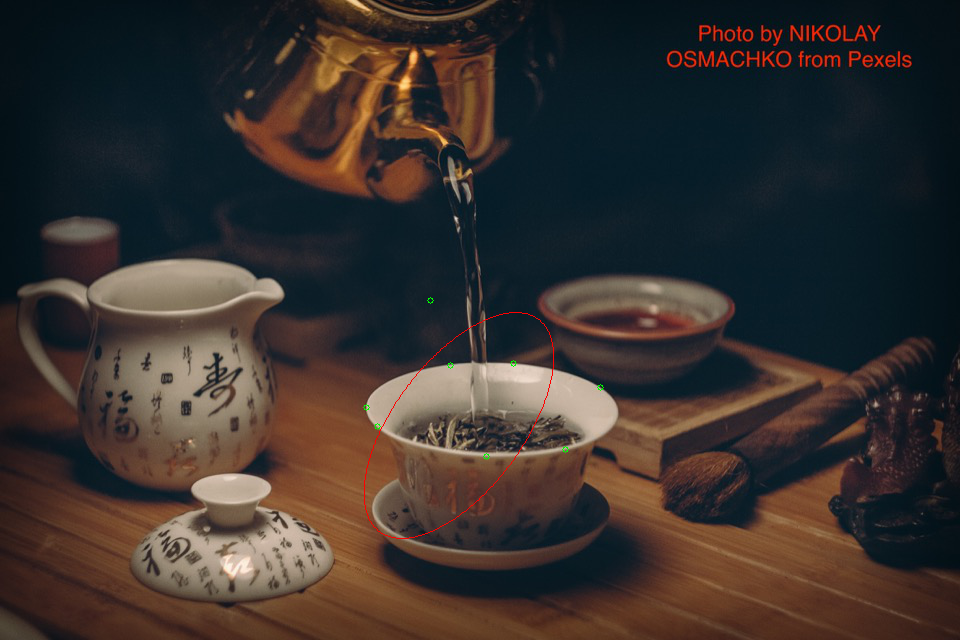

In [73]:
img = imgc.copy()
points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [600, 387], [450, 365], [430, 300] ], np.double)

draw_ellipse(img, points)

# Max deviation of ellipse to normally distributed error

In [0]:
def get_ellipse(points): 
  m = np.zeros((len(points), 6))

  for k in range(0, len(points)):
    m[k][0] = points[k][0]**2
    m[k][1] = 2*points[k][0]*points[k][1]
    m[k][2] = points[k][1]**2
    m[k][3] = 2*points[k][0]
    m[k][4] = 2*points[k][1]
    m[k][5] = 1

  mu, ms, mv = np.linalg.svd(m)
  R = mv[-1, :]
  R /= R[0] 

  E = np.array(
        [[R[0], R[1], R[3]],
         [R[1], R[2], R[4]],
         [R[3], R[4], R[5]]], np.double)

  U, S, V = np.linalg.svd(E)
  H = np.linalg.inv(np.matmul(U, np.diag(np.sqrt(S))).T)

  points = np.zeros((360, 2))
  for alpha in range(0, 360):
    x, y = np.matmul(H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]])[:2]
    points[alpha][0] = x[0]
    points[alpha][1] = y[0]
  
  return points

In [0]:
true_points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [600, 387] ], np.double)
true_ellipse = get_ellipse(true_points)

def calculate_max_error(sigma):
  points = np.zeros(true_points.shape)
  
  # add points with noise
  for i, tp in enumerate(true_points):
    points[i][0] = tp[0] + np.random.normal(0, sigma)
    points[i][1] = tp[1] + np.random.normal(0, sigma)
    
  ellipse = get_ellipse(points)
  max_error = np.linalg.norm(true_ellipse - ellipse, axis=1).max()
  
  return max_error  

In [0]:
sigmas = list(range(1, 21))
n = 10
max_mean_errors = []

for sigma in sigmas:
  max_errors = [calculate_max_error(sigma) for _ in range(n)]
  max_mean_errors.append(np.mean(max_errors))

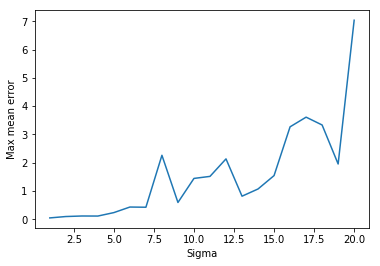

In [68]:
plt.plot(sigmas, max_mean_errors)
plt.xlabel('Sigma')
plt.ylabel('Max mean error')
plt.show()

As we see, the more deviation random error has the more mean ellipse error we get.